In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [15]:
def get_x_and_y(dataset: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    x = dataset.drop(['label'], axis=1)
    y = dataset['label']

    label_encoder = LabelEncoder()
    label_encoder.fit(y)
    y = label_encoder.transform(y)

    return x, y, label_encoder

In [16]:
df = pd.read_csv("new_data.csv")

train, test = train_test_split(df, test_size=0.2, random_state=42)

x_train, y_train, label_encoder = get_x_and_y(train)
x_test, y_test, label_encoder = get_x_and_y(test)

In [17]:
tree_classifier = DecisionTreeClassifier(max_depth=8, random_state=42)
tree_classifier.fit(x_train, y_train)

y_predicted = tree_classifier.predict(x_train)

acc = accuracy_score(y_train, y_predicted)

print(f'Train error: {acc*100:.2f}%')

y_predicted = tree_classifier.predict(x_test)
acc = accuracy_score(y_test, y_predicted)

print(f'Test error: {acc*100:.2f}%')

Train error: 97.69%
Test error: 92.99%


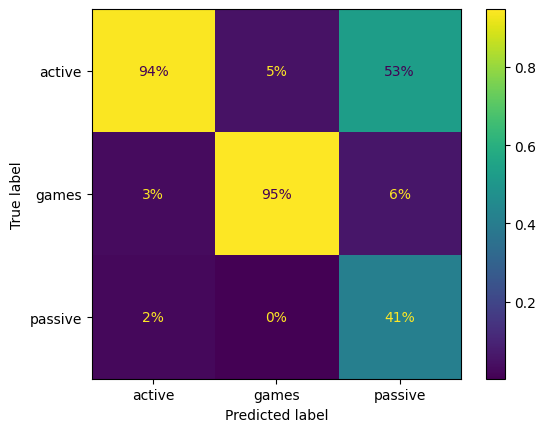

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_predictions(y_test, y_predicted, normalize='pred', values_format=".00%", display_labels=label_encoder.classes_)
plt.show()